# Performing EDA

In [258]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [259]:
#Data Loading and Inspection
df = pd.read_csv("../DataCollection/heart_disease_uci.csv")

df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [260]:
# Drop unnecessary columns
df.drop(['id', 'dataset'], axis=1, inplace=True)

In [342]:
#exploring the datatype of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                919 non-null    float64
 1   sex                                919 non-null    int64  
 2   trestbps                           919 non-null    float64
 3   chol                               919 non-null    float64
 4   fbs                                919 non-null    int32  
 5   thalch                             919 non-null    float64
 6   exang                              919 non-null    int32  
 7   oldpeak                            919 non-null    float64
 8   ca                                 919 non-null    float64
 9   num                                919 non-null    int64  
 10  cp_asymptomatic                    919 non-null    int32  
 11  cp_atypical angina                 919 non-null    int32  
 12 

## Age Column

In [264]:
#dealing with age column
print("The minimum age is:", df['age'].min(), "and the maximum age is:", df['age'].max())
print("The mean age is:", df['age'].mean())

The minimum age is: 28 and the maximum age is: 77
The mean age is: 53.51086956521739


The age of the patients ranges from 28 to 77 years, and mean age of patients is 54 years.

Text(0.5, 1.0, 'Distribution of age')

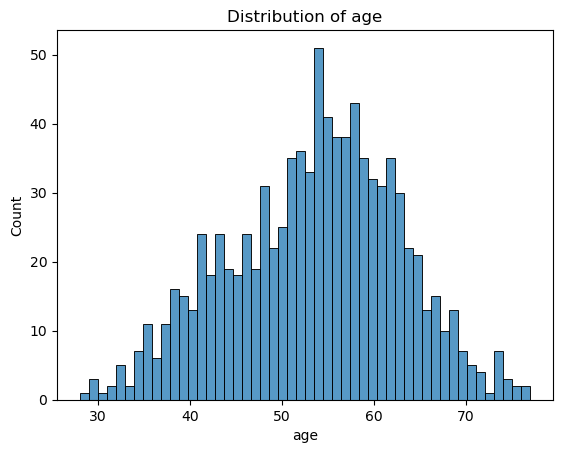

In [265]:
sns.histplot(df['age'] , bins = 50)
plt.title("Distribution of age")

The age distribution appears normal (bell-shaped).

The most frequent age range is 50–60 years, with a peak around 55 years.

The dataset includes individuals aged approximately 30 to 75 years.


## Sex Column

sex
Male      726
Female    194
Name: count, dtype: int64
The mean age of each gender is:  sex
Female    52.474227
Male      53.787879
Name: age, dtype: float64


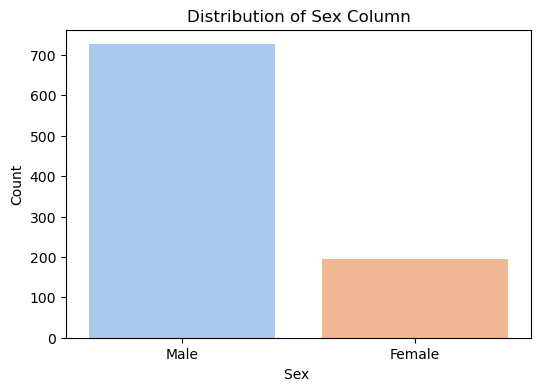

In [266]:
#dealing with sex column
print(df['sex'].value_counts())

# calculate mean of age column for each gender
print("The mean age of each gender is: ", df.groupby('sex')['age'].mean())

# Count plot
plt.figure(figsize=(6, 4))
sns.countplot(x="sex", data=df, hue="sex", palette="pastel", legend=False)
plt.xlabel("Sex ")
plt.ylabel("Count")
plt.title("Distribution of Sex Column")
plt.show()


## Chest Pain Column

In [267]:
#dealing with cp (chest pain) column
print(df['cp'].head())
print(df['cp'].value_counts())

#Data for chest pain types
labels = ["Asymptomatic", "Non-Anginal", "Atypical Angina", "Typical Angina"]
values = [496, 204, 174, 46]

# Create pie chart
fig = px.pie(names=labels, values=values, title="Distribution of Chest Pain Types", hole=0.3)

# Show figure
fig.show()

0     typical angina
1       asymptomatic
2       asymptomatic
3        non-anginal
4    atypical angina
Name: cp, dtype: object
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


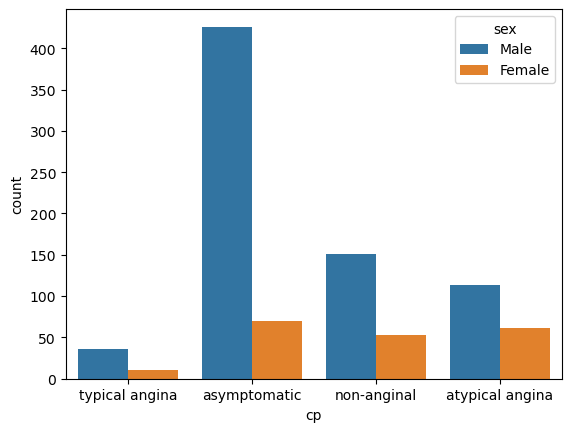

cp               sex   
asymptomatic     Male      426
                 Female     70
atypical angina  Male      113
                 Female     61
non-anginal      Male      151
                 Female     53
typical angina   Male       36
                 Female     10
Name: count, dtype: int64


In [268]:
sns.countplot(x='cp', data=df,hue='sex')
plt.show()

print(df.groupby('cp')['sex'].value_counts())

All types of chest pain are present in both males and females but males are more affected than females.

In [269]:
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()



print(df.groupby('cp')['age'].value_counts())


asymp = df[df['cp'] == 'asymptomatic']['age'].value_counts().sum()
non_ang = df[df['cp'] == 'non-anginal']['age'].value_counts().sum()
atypical_ang = df[df['cp'] == 'atypical angina']['age'].value_counts().sum()
typical_ang = df[df['cp'] == 'typical angina']['age'].value_counts().sum()

print("the no of patients with Asymptomatic cp are: ", asymp)
print("the no of patients with non-anginal cp are: ", non_ang)
print("the no of patients with Atypical angina cp  are: ", atypical_ang)
print("the no of patients with typical angina cp  are: ", typical_ang)

cp              age
asymptomatic    57     27
                58     23
                54     22
                59     22
                60     22
                       ..
typical angina  60      1
                63      1
                66      1
                68      1
                74      1
Name: count, Length: 156, dtype: int64
the no of patients with Asymptomatic cp are:  496
the no of patients with non-anginal cp are:  204
the no of patients with Atypical angina cp  are:  174
the no of patients with typical angina cp  are:  46


It is clear that most of the patients having heart disease but do not have any chest pain,which is about 53% ,(496/920.)

A significant portion 204 of individuals experience chest pain that is not related to angina or heart disease, indicating that other conditions (like musculoskeletal or gastrointestinal issues) might be causing discomfort.

20 % individuals have Atypical Angina which not directly linked with symptoms of angina but can linked with heart disease.

5 % of patients have typical angina caused by coronary artery disease (CAD) where the arteries supplying the heart become narrowed or blocked. 

## Resting Blood Pressure (trestbps column)

| Category             | Systolic BP (mmHg) | Interpretation                                   |
|----------------------|--------------------|--------------------------------------------------|
| Normal	           | < 120	            | Healthy blood pressure                           |
| Elevated             | 120 - 129	        | Increased risk, lifestyle changes recommended    |
| Hypertension Stage 1 | 130 - 139	        | Mild high blood pressure, may require medication |
| Hypertension Stage 2 | 140 - 180	        | Moderate to severe high blood pressure           |
| Hypertensive Crisis  | > 180	            | Dangerously high, requires immediate medical attention |

In [270]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Missing values: 59


<Axes: xlabel='trestbps', ylabel='Count'>

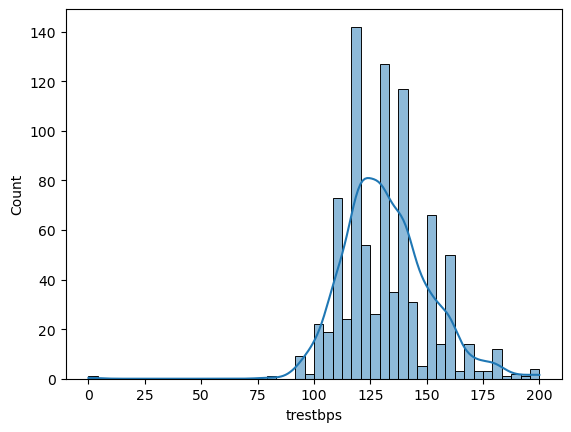

In [271]:
print("Missing values:", df['trestbps'].isnull().sum())
sns.histplot(df['trestbps'], kde=True)

this column **"trestbps"** contains **59** missing values and from the graph we can see the distribution is slightly right-skewed,so filling missing values with the median.

130.0
Missing Values: 0


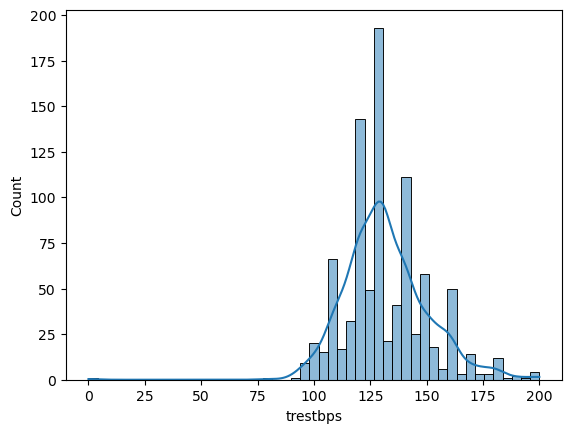

In [272]:
print(df['trestbps'].median())

# Fill missing values with the median
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())

print("Missing Values:" , df['trestbps'].isnull().sum())

sns.histplot(df['trestbps'], kde=True)

#removing rows where value is zero
df[df['trestbps'] == 0]
df = df[df['trestbps'] != 0]



Category_bps
Hypertension Stage 2    303
Hypertension Stage 1    236
Elevated                211
Normal                  161
Hypertensive Crisis       8
Name: count, dtype: int64


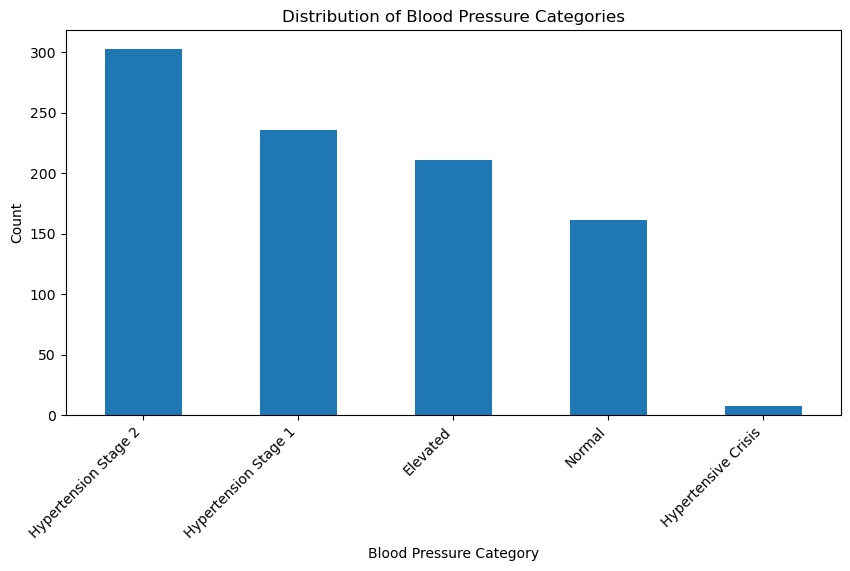

In [273]:
#Define function to classify BP
def classify_bp(value):
    if value < 120:
        return "Normal"
    elif 120 <= value <= 129:
        return "Elevated"
    elif 130 <= value <= 139:
        return "Hypertension Stage 1"
    elif 140 <= value <= 180:
        return "Hypertension Stage 2"
    elif 180 < value <= 200:
        return "Hypertensive Crisis"
    return "Unknown"

df['Category_bps'] = df['trestbps'].apply(classify_bp)

# Compute and display frequency
print(df['Category_bps'].value_counts())

grouped_freq = df['Category_bps'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 5))
grouped_freq.plot(kind='bar')
plt.xticks(rotation=45, ha='right')  
plt.xlabel("Blood Pressure Category")
plt.ylabel("Count")
plt.title("Distribution of Blood Pressure Categories")
plt.show()

<Axes: xlabel='Category_bps', ylabel='count'>

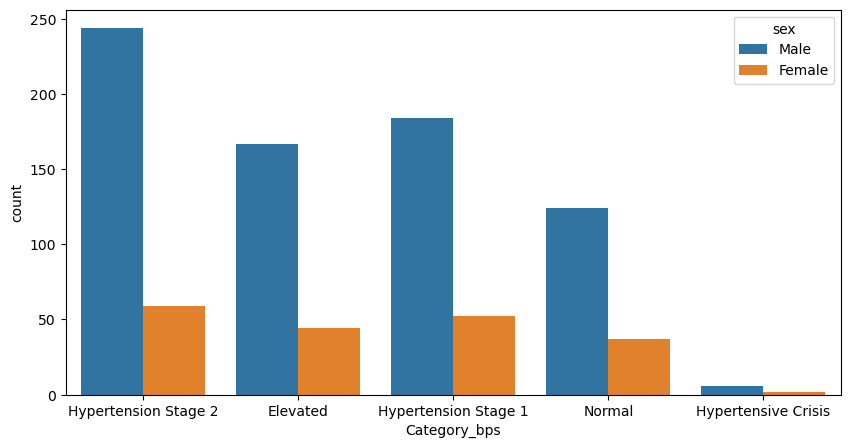

In [274]:
#checking bp according to gender
plt.figure(figsize=(10, 5))
sns.countplot(x='Category_bps', data=df,hue='sex')

In [275]:
gender_bps_counts = df.groupby(['sex', 'Category_bps']).size().unstack()
print(gender_bps_counts)

Category_bps  Elevated  Hypertension Stage 1  Hypertension Stage 2  \
sex                                                                  
Female              44                    52                    59   
Male               167                   184                   244   

Category_bps  Hypertensive Crisis  Normal  
sex                                        
Female                          2      37  
Male                            6     124  


we can see that at the time of admission in hospital most patients have bps between 140-180 which is hypertension stage 2, and is a serious condition that needs immediate attention and we also found that 8 patients bps crossed 180 which is alarming and we can see in all cases males are most affected than females

## Chol Column

count    889.000000
mean     199.354331
std      110.641330
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64
Missing Values: 30


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\3902419681.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\hp\AppData\Local\Temp\ipykernel_6340\3902419681.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

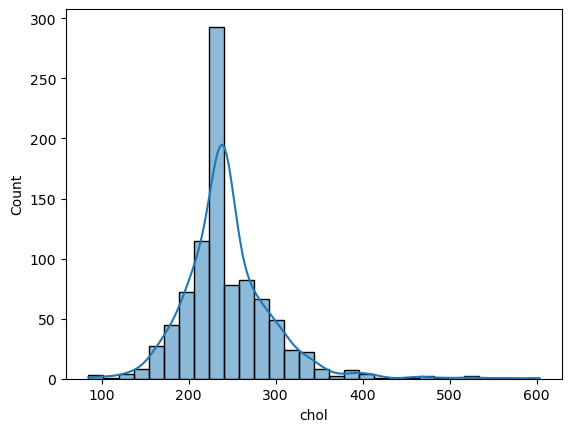

In [276]:
#dealing with chol (cholesterol) column
print(df['chol'].describe())

#finding missing values
print("Missing Values:", df['chol'].isnull().sum())

#replacing 0 values with nan
df['chol'].replace(0, np.nan, inplace= True)

#filling the missing values
df['chol'].fillna(df['chol'].median(), inplace= True)


sns.histplot(df['chol'], kde=True, bins= 30)

#distribution of chol column
fig = px.histogram(data_frame=df, x='chol')
fig.show()




The histogram above represents the distribution of **cholesterol levels (`chol`)** in the dataset, with a KDE curve overlaid to visualize the overall distribution trend.

- The most **frequent cholesterol level** is around **240 mg/dL**, indicated by the highest peak.
- The data ranges approximately from **100 mg/dL to 600 mg/dL**, with most values concentrated between **150 mg/dL and 350 mg/dL**.

**medically**
- A normal cholesterol level is generally **below 200 mg/dL**.
- Borderline high levels range between **200-239 mg/dL**.
- High cholesterol is **240 mg/dL or more**, which is associated with an increased risk of heart disease.


## Fbs column (Fasting Blood Suger)

The fbs column, representing fasting blood sugar, is clinically important because a level above 120 mg/dL is often indicative of diabetes, which is a significant risk factor for heart disease. Elevated fasting blood sugar can damage blood vessels and increase the risk of cardiovascular conditions. 

0: Fasting blood sugar is below 120 mg/dL.

1: Fasting blood sugar is above 120 mg/dL

fbs
False    691
True     138
Name: count, dtype: int64
90


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\2877287213.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\hp\AppData\Local\Temp\ipykernel_6340\2877287213.py:7: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



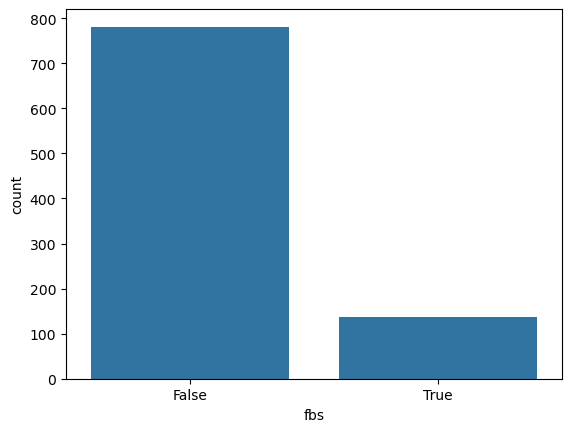

In [277]:
#dealing fbs column
print(df['fbs'].value_counts())

print(df['fbs'].isnull().sum()) 

#filling missing values
df['fbs'].fillna(df['fbs'].mode()[0], inplace= True)

sns.countplot(x='fbs', data=df)
plt.show()

This bar chart represents the distribution of fasting blood sugar (`fbs`) in the dataset, where:

- **0** indicates fasting blood sugar < 120 mg/dL.
- **1** indicates fasting blood sugar ≥ 120 mg/dL.

- A **majority** of individuals in the dataset have fasting blood sugar levels **below** 120 mg/dL (`0`).
- A **smaller proportion** of individuals have fasting blood sugar levels **above or equal** to 120 mg/dL (`1`).

This suggests that high fasting blood sugar is less common in this dataset.

## Dealing with restecg column

| restecg Value  | Type of ECG Result                 |Meaning & Possible Causes|
|----------------|------------------------------------|-------------------------|
| 0              | Normal                             | No abnormalities in heart function.   |
| 1              | ST-T Wave Abnormality              |Possible ischemia, electrolyte issues,or early signs of heart disease.|
| 2             | Left Ventricular Hypertrophy (LVH) | Thickened heart muscle due to high blood pressure or other conditions.  | 
                

In [278]:
#dealing with restecg column
print(df['restecg'].value_counts())

#finding missing values
print(df['restecg'].isnull().sum())

#filling missing values
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)

#gender connection with restecg
fig = px.histogram(data_frame=df, x='restecg', color='sex')
fig.show()

restecg
normal              550
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
2


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\3960746425.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Males show a higher count of ST-T abnormalities, normal, and lv hypertrophy compared to females.

This stacked bar chart illustrates the distribution of different resting ECG results (`restecg`) in the dataset, categorized by gender:

- **0 (Normal ECG)**: Majority of individuals fall under this category, with a greater proportion of males (`1`) than females (`0`).
- **1 (ST-T Abnormality)**: Fewer individuals have ST-T abnormalities, but it is observed in both genders.
- **2 (Left Ventricular Hypertrophy - LVH)**: Similar to ST-T abnormalities, LVH is present in a smaller proportion of individuals, again with males (`1`) forming the larger group.

### Analysis:
- The **normal ECG** category is the most prevalent in both genders.
- Males (`1`) tend to have a higher proportion of normal and abnormal ECG results compared to females.
- **Abnormal ECG patterns (ST-T abnormalities & LVH)** are less frequent but present across both genders.

## Dealing with thalch(maximum heart rate achieved) column

count    864.000000
mean     137.525463
std       25.934480
min       60.000000
25%      120.000000
50%      140.000000
75%      157.000000
max      202.000000
Name: thalch, dtype: float64
55


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\1601119614.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Text(0.5, 1.0, 'Distribution of Maximum Heart Rate (thalch)')

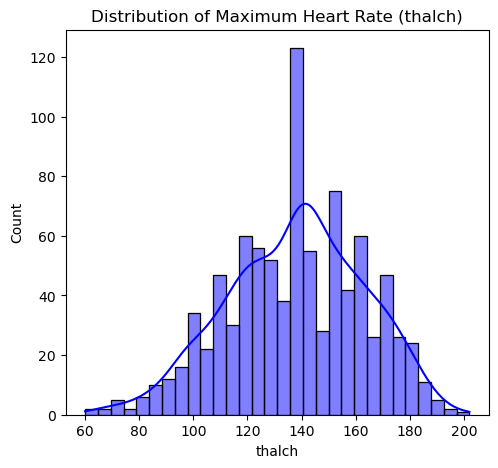

In [279]:
print(df['thalch'].describe())

print(df['thalch'].isnull().sum())  # Count missing values

#filling missing values
df['thalch'].fillna(df['thalch'].median(), inplace= True)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['thalch'], bins=30, kde=True, color='blue')
plt.title("Distribution of Maximum Heart Rate (thalch)")


The histogram and KDE plot above represent the distribution of **Maximum Heart Rate Achieved (thalch)** in the dataset. 

#### Key Observations:
- The distribution appears **approximately normal**, with most values concentrated between **100 and 170 bpm**.
- There is a **peak around 140 bpm**, indicating that a large number of individuals have a maximum heart rate in this range. 


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\2701304522.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




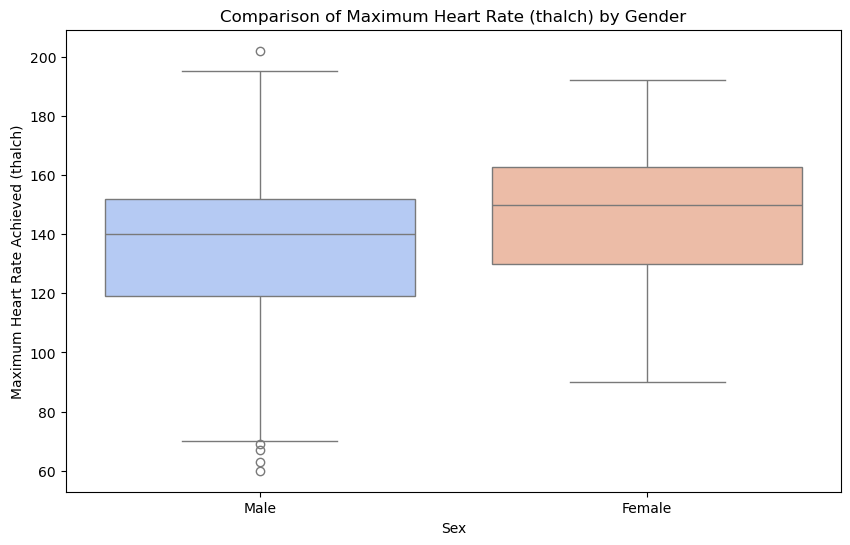

In [280]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='thalch', data=df, palette='coolwarm')
plt.xlabel('Sex')
plt.ylabel('Maximum Heart Rate Achieved (thalch)')
plt.title('Comparison of Maximum Heart Rate (thalch) by Gender')

plt.show()


- This box plot compares the distribution of **thalch (Maximum Heart Rate Achieved)** between **males (1) and females (0)**.
- The **median** heart rate is slightly higher in **females** compared to males.
- The **interquartile range (IQR)**, which represents the middle 50% of data points, is **narrower for males**, indicating less variation in heart rate.
- **Females tend to have a slightly higher maximum heart rate**, but their data distribution shows more spread.
- Overall, while there are differences in the spread and median values, the maximum heart rates achieved by both genders follow a similar distribution.

## Dealing with exang (exang is the exercise induced angina which is recorded as 1 if there is pain and 0 if there is no pain) column


Clinical Interpretation:
Exang represents whether a patient experiences exercise-induced angina (chest pain).

Positive (exang = 1): Indicates chest pain during exercise, often a sign of coronary artery disease.

Negative (exang = 0): No chest pain with exercise, typically suggesting better heart health.

exang
False    527
True     337
Name: count, dtype: int64
55


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\3878202584.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\hp\AppData\Local\Temp\ipykernel_6340\3878202584.py:11: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



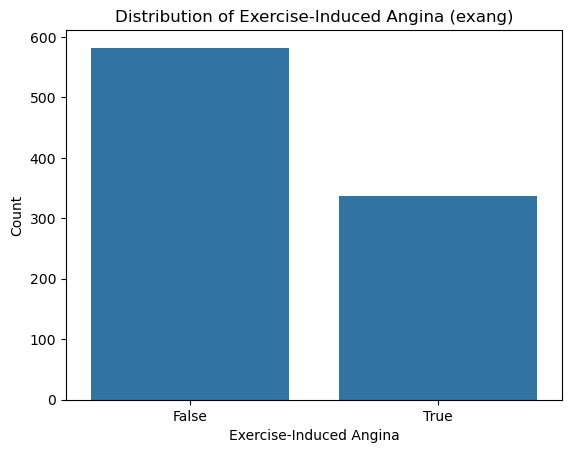

In [281]:
#deal with exang column
print(df['exang'].value_counts())  # Count for values

df['exang'].dtypes

# Counting missing values
print(df['exang'].isnull().sum())  


#filling missing values
df['exang'].fillna(df['exang'].mode()[0], inplace= True)

sns.countplot(x=df['exang'])
plt.title('Distribution of Exercise-Induced Angina (exang)')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.show()


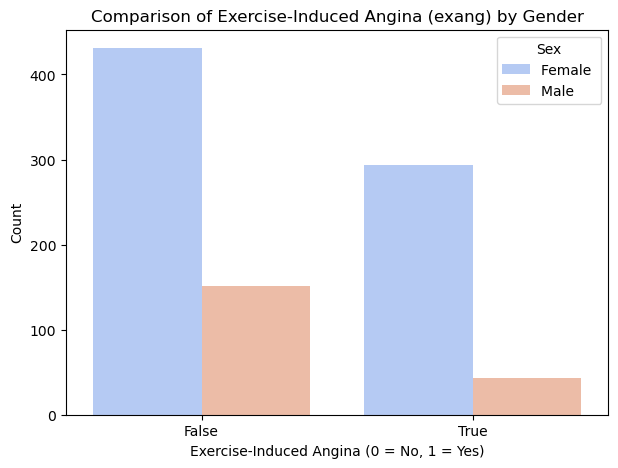

In [282]:
plt.figure(figsize=(7,5))
sns.countplot(x='exang', hue='sex', data=df, palette='coolwarm')

plt.title('Comparison of Exercise-Induced Angina (exang) by Gender')
plt.xlabel('Exercise-Induced Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female ', 'Male '])

plt.show()

The countplot visualizes the distribution of **Exercise-Induced Angina (`exang`)** across **Gender (`sex`)**.

  - The majority of individuals **do not experience angina during exercise** (`exang=0`).
  - More **males** (`sex=1`) experience **exercise-induced angina** (`exang=1`) compared to females (`sex=0`).
  - Among those **who do not experience angina (`exang=0`)**, both males and females are present, but males still appear more frequently.


## dealing with oldpeak(ST depression induced by exercise relative to rest)  column

count    857.000000
mean       0.878063
std        1.091657
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64
857
mising values: 62


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\351269041.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





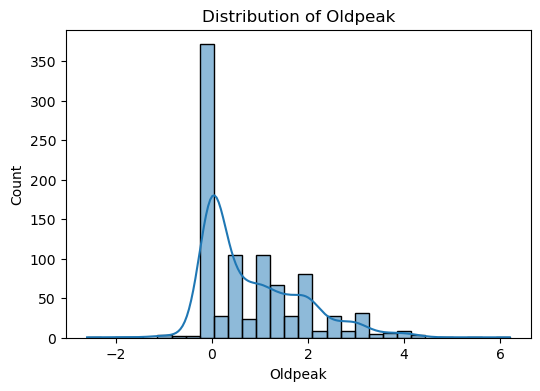

In [283]:
#dealing with oldpeak column
print(df['oldpeak'].describe())

print(df['oldpeak'].value_counts().sum())

#counting missing values
print("mising values:", df['oldpeak'].isnull().sum())


#filling the missing values
df['oldpeak'].fillna(df['oldpeak'].median(), inplace= True)

plt.figure(figsize=(6, 4))
sns.histplot(df['oldpeak'], bins=30, kde=True)
plt.title("Distribution of Oldpeak")
plt.xlabel("Oldpeak")
plt.ylabel("Count")
plt.show()



Most values are clustered around 0. This suggests that many patients have no ST depression.

## Dealing with slope column

(Upsloping) → Considered normal

(Flat) → Possibly indicating heart disease

(Downsloping) → Strongly associated with heart disease

slope
flat           344
upsloping      203
downsloping     63
Name: count, dtype: int64
Missing values: 309
Data type: object


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\1274427082.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\hp\AppData\Local\Temp\ipykernel_6340\1274427082.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




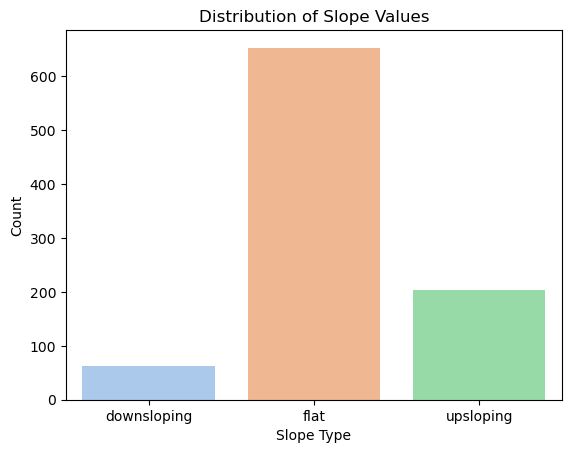

In [284]:
#dealing with slope column
print(df['slope'].value_counts())

print("Missing values:", df['slope'].isnull().sum())
print("Data type:", df['slope'].dtype)


#filling missing values
df['slope'].fillna(df['slope'].mode()[0], inplace= True)


sns.countplot(data=df, x='slope', palette='pastel')
plt.title("Distribution of Slope Values")
plt.xlabel("Slope Type")
plt.ylabel("Count")
plt.show()


This bar chart visualizes the distribution of **slope types of the peak exercise ST segment**, categorized as:
- **Downsloping**: Indicative of possible ischemia.
- **Flat**: Could suggest an abnormal response to exercise.
- **Upsloping**: Generally considered a normal response.

#### Key Observations:
- The majority of individuals have a "flat" slope type.
  - This suggests a high prevalence of **abnormal ST segment responses** in the dataset.
  
- The "upsloping" category is the second most common.
  - This is typically considered a healthier sign.
  
- "Downsloping" is the least common but is concerning as it is associated with ischemia and a higher risk of heart disease.
  - This group should be closely monitored for potential cardiac issues.


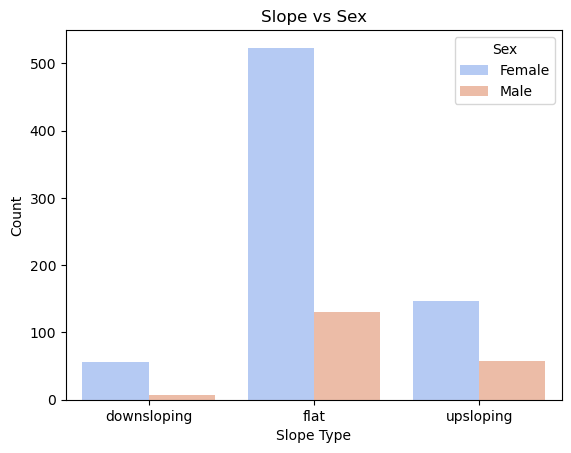

In [285]:
sns.countplot(data=df, x='slope', hue='sex', palette='coolwarm')
plt.title("Slope vs Sex")
plt.xlabel("Slope Type")
plt.ylabel("Count")
plt.legend(title="Sex", labels=["Female", "Male"])
plt.show()


This bar chart presents the distribution of **slope types of the peak exercise ST segment** across **males and females**.

#### Key Observations:
- Males dominate all categories, especially in the "flat" slope type. 
  - This suggests that a **higher number of males exhibit abnormal ST segment responses** during peak exercise.
  
- Females have fewer cases overall but show a relatively higher proportion in the "flat" and "upsloping" categories. 
  - A **"flat" slope is often linked to heart disease**, meaning that females with this condition may be at risk.
  - **"Upsloping" is generally considered a normal response**, indicating better heart health outcomes.

- "Downsloping" is the least common for both sexes but is slightly more frequent in males. 
  - This is significant because **downsloping ST segments are associated with ischemia**.

#### Interpretation:
- The **high prevalence of "flat" slopes among males** could indicate a greater likelihood of heart disease risk in men compared to women in this dataset.
- **Females with "flat" slopes should still be monitored closely**, as this could signal potential cardiovascular issues.


## Dealing with the ca (number of major vessels) Column

0 = No major vessels blocked.

1 = One vessel with significant narrowing.

2 = Two vessels affected.

3  = Severe multi-vessel disease.

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64
Missing values: 610


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\1905848789.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\hp\AppData\Local\Temp\ipykernel_6340\1905848789.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




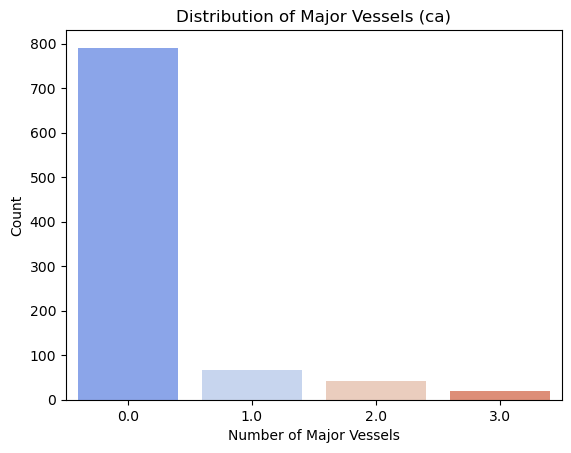

In [286]:
#dealing with ca (number of major vessels (0-3) colored by fluoroscopy) column
print(df['ca'].value_counts())

#counting missing values
print("Missing values:", df['ca'].isnull().sum())




#filling missing values
df['ca'].fillna(df['ca'].mode()[0], inplace= True)

sns.countplot(data=df, x='ca', palette='coolwarm')
plt.title("Distribution of Major Vessels (ca)")
plt.xlabel("Number of Major Vessels")
plt.ylabel("Count")
plt.show()


This bar chart visualizes the distribution of the **number of major vessels (ca) colored by fluoroscopy** in the dataset.

#### Key Observations:
- A large majority of cases (~800) have 0 major vessels with fluoroscopy data. 
  - This suggests that **most individuals in the dataset do not have detectable major vessel narrowing**.
  
- The number of cases decreases significantly as the number of affected vessels increases. 
  - Very few individuals have **1, 2, or 3 major vessels affected**.
  
- **Few cases with 3 affected vessels** may indicate that severe coronary artery disease (CAD) is less frequent in this dataset.


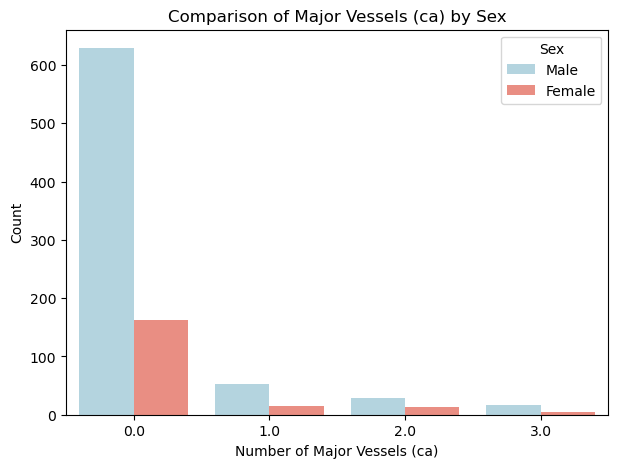

In [287]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='ca', hue='sex', palette=['lightblue', 'salmon'])
plt.xlabel("Number of Major Vessels (ca)")
plt.ylabel("Count")
plt.title("Comparison of Major Vessels (ca) by Sex")
plt.legend(title="Sex")

plt.show()


## Dealing with thal column

The thal column represents thallium stress test results, which assess blood flow to the heart under stress. It is a categorical feature with three standard levels:

normal → Healthy blood flow.

fixed defect → Permanent damage (scarred heart tissue).

reversible defect → Temporary blockage (e.g., ischemia).


Clinical Importance:

reversible defect → Highest heart disease risk.

fixed defect → Moderate risk (stable damage).

normal → Low risk.

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64
Missing values: 485


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\1383691847.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





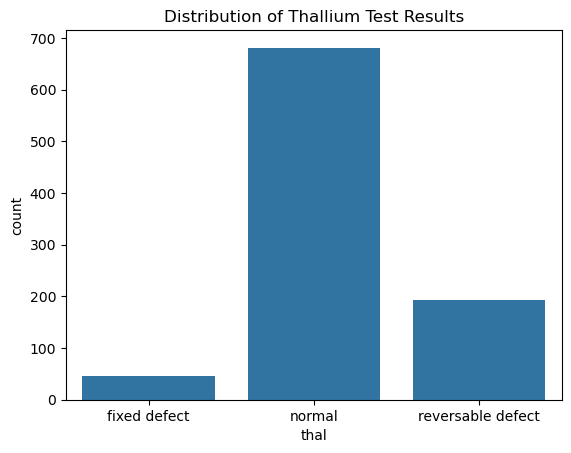

In [288]:
#dealing with thal column
print(df['thal'].value_counts())

print("Missing values:", df['thal'].isnull().sum())

#filling missing values
df['thal'].fillna(df['thal'].mode()[0],inplace= True)

sns.countplot(x='thal', data=df)
plt.title('Distribution of Thallium Test Results')
plt.show()


This bar chart displays the distribution of **Thallium Stress Test (`thal`)** results among patients.

#### Key Observations:
- The majority of patients have a "normal" Thallium test result.
  - This category has the highest count, indicating that most patients do not show abnormalities in their test results.

- "Reversible defect" is the second most common category.
  - This suggests that a significant number of patients exhibit **temporary** blood flow issues, which could indicate coronary artery disease.

- "Fixed defect" is the least common result. 
  - This means that a smaller proportion of patients show **permanent** damage to heart tissue, which may indicate past heart attacks or long-term ischemia.


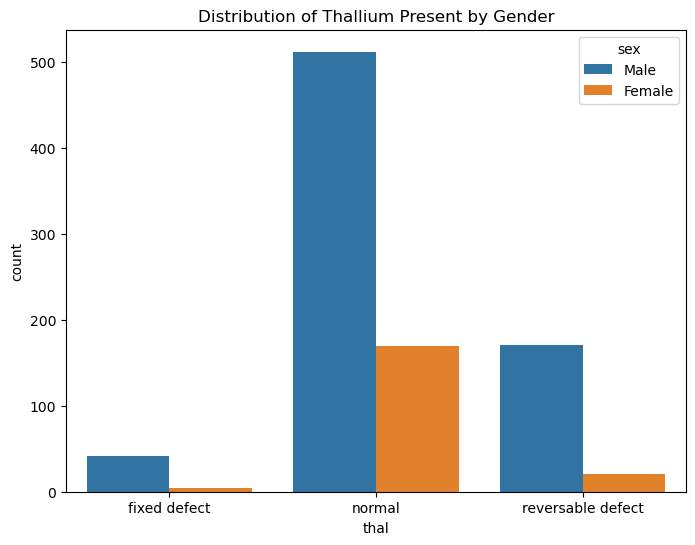

In [289]:
plt.figure(figsize=(8, 6))
sns.countplot(x='thal', hue='sex', data=df)
plt.title('Distribution of Thallium Present by Gender')
plt.show()


This bar chart visualizes the distribution of **Thallium Stress Test (`thal`)** results, categorized by **sex**.

#### Key Observations:
- Most individuals have a "normal" Thallium test result.  
  - The number of males (`sex = 1`) with normal results is significantly higher than females (`sex = 0`).
  
- "Reversible defect" is more common in males than females. 
  - This suggests that more males exhibit **temporary blood flow issues**, which can indicate ischemic heart disease.
  
- "Fixed defect" is the least common across both sexes. 
  - A small percentage of both males and females show permanent damage to the heart tissue.

## Dealing with num Column

In [290]:
#Dealing with num column
df['num'].unique()


array([0, 2, 1, 3, 4], dtype=int64)

this column is used to predict the heart disease. The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.

0 = no heart disease

1 = mild heart disease

2 = moderate heart disease

3 = severe heart disease

4 = critical heart disease

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\4284189793.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




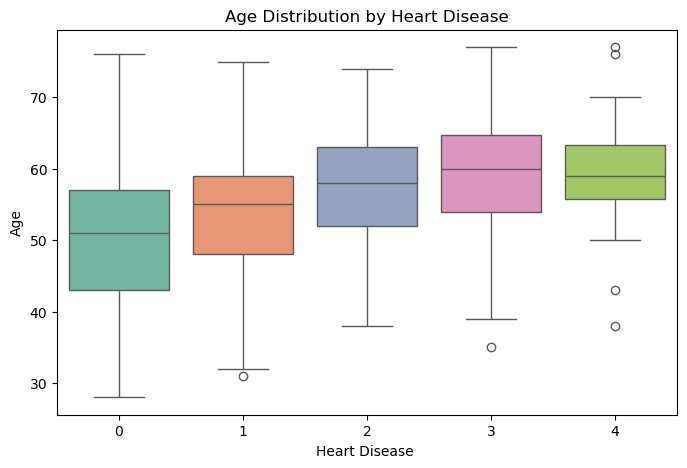

In [291]:
print(df['num'].value_counts())

# Age vs. num
plt.figure(figsize=(8, 5))
sns.boxplot(x='num', y='age', data=df, palette='Set2')
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Heart Disease ")
plt.ylabel("Age")
plt.show()

The graph demonstrates that:

- Heart disease severity strongly correlates with advancing age.

- The most severe cases predominantly occur in patients over 65.

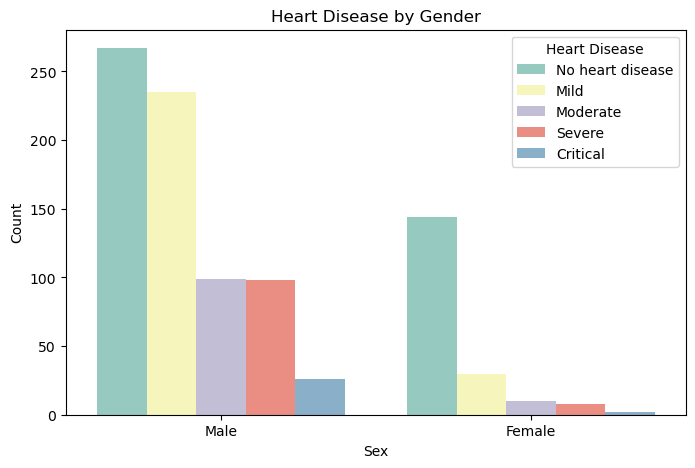

In [292]:
# Sex vs num 
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='num', data=df, palette='Set3')
plt.title("Heart Disease by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No heart disease", "Mild", "Moderate", "Severe", "Critical"])
plt.show()

This grapgh visualizes the distribution of heart disease severity across genders.

The key observations from the graph are:

- Males have a higher prevalence of heart disease compared to females .  

- The majority of individuals in both genders have no heart disease, but the proportion of males affected by heart disease is significantly higher. 

- Mild and moderate heart disease cases are more frequent in males than in females.  

- Severe and critical heart disease cases are present in males, while females have very few or no cases in these categories.  

This suggests that males in the dataset are at a higher risk of heart diseasen compared to females.

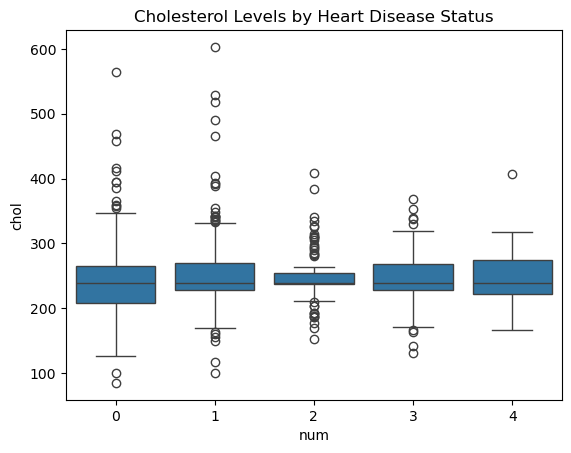

In [293]:
#Cholesterol vs. heart disease
sns.boxplot(x='num', y='chol', data=df)
plt.title('Cholesterol Levels by Heart Disease Status')
plt.show()

This box plot visualizes the distribution of cholesterol levels (`chol`) across different heart disease severity levels (`num`).

- The median cholesterol level remains relatively consistent across all heart disease categories.  
- There is a wide spread of cholesterol values, with some individuals having very high cholesterol levels (> 400), particularly in categories `0` (no heart disease) and `1` (mild heart disease).  
- Outliers are present in all categories, indicating that some individuals have unusually high cholesterol levels.  

This analysis implies that cholesterol levels vary significantly among individuals.

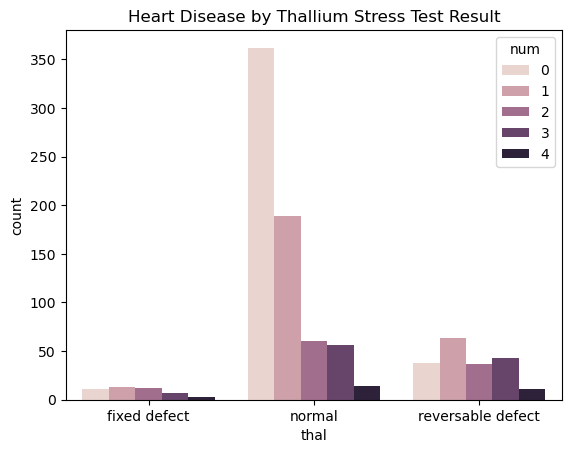

In [294]:
#'num' vs 'thal'
sns.countplot(x='thal', hue='num', data=df)
plt.title('Heart Disease by Thallium Stress Test Result')
plt.show()


This graph represents the distribution of heart disease severity (`num`) based on the Thallium Stress Test result (`thal`), categorized as fixed defect, normal, and reversible defect:

- Most individuals with no heart disease (num = 0) have a normal Thallium test result, with a significantly higher count compared to other groups.
- Patients with mild and moderate heart disease (num = 1, 2) are also predominantly in the normal category, but their distribution extends to the reversible defect category.
- Severe and critical heart disease cases (num = 3, 4) are more likely to have reversible defects, suggesting that such defects may indicate more serious heart conditions.
- Fixed defects appear in all groups but with a lower count, indicating they are less common compared to normal or reversible defects.

This analysis suggests that while a normal Thallium stress test result is common across all categories, reversible defects are more associated with higher heart disease severity.


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\1435151584.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




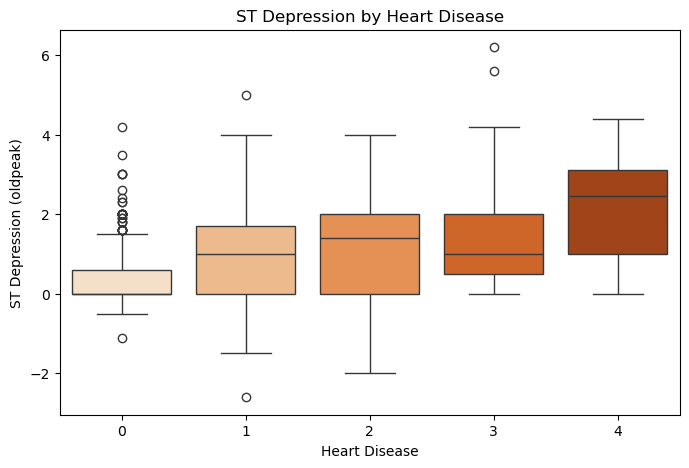

In [295]:
#ST Depression (oldpeak) vs. num (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='num', y='oldpeak', data=df, palette='Oranges')
plt.title("ST Depression by Heart Disease")
plt.xlabel("Heart Disease" )
plt.ylabel("ST Depression (oldpeak)")
plt.show()

This box plot illustrates the distribution of ST Depression (`oldpeak`) values across different levels of heart disease severity (`num`):

- Patients without heart disease (num = 0) have the lowest median `oldpeak` values, with a relatively small interquartile range (IQR).
- As heart disease severity increases (num = 1 to 4), the median and spread of `oldpeak` values also increase, indicating a positive correlation between ST depression and heart disease severity.
- Patients with critical heart disease (num = 4) exhibit the highest median `oldpeak` values and a wider spread, suggesting that severe cases tend to have greater ST depression.


## Interpretation:
- ST Depression (`oldpeak`) is a crucial marker in ECG readings, reflecting heart stress and ischemia.
- Higher `oldpeak` values are strongly associated with more severe heart disease, reinforcing its diagnostic importance.
- This trend suggests that patients with elevated ST depression levels are more likely to have advanced heart disease, making `oldpeak` a valuable predictor in heart disease assessment.


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\3407205009.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




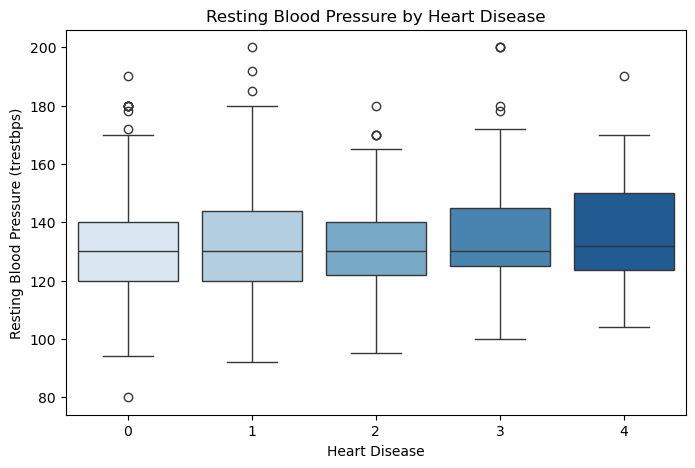

In [296]:
#Resting Blood Pressure (trestbps) vs num (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='num', y='trestbps', data=df, palette='Blues')
plt.title("Resting Blood Pressure by Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Resting Blood Pressure (trestbps)")
plt.show()

This box plot represents the distribution of Resting Blood Pressure (`trestbps`) across different levels of heart disease severity (`num`):

- The median resting blood pressure is slightly higher in patients with more severe heart disease (num = 3 and 4) compared to those without heart disease (num = 0).
- Interquartile ranges (IQR) are similar across all categories, suggesting that blood pressure variability is fairly consistent regardless of heart disease severity.
- There is no strong increasing trend in blood pressure as heart disease severity increases, indicating that while high blood pressure may be a risk factor, it is not the sole determinant of heart disease.

## Interpretation:
- Resting blood pressure alone may not be a strong predictor of heart disease severity, as its distribution remains fairly stable across all groups.
- However, higher blood pressure is often associated with cardiovascular risks, and in combination with other factors (    e.g., cholesterol, ST depression), it may contribute to worsening heart conditions.


C:\Users\hp\AppData\Local\Temp\ipykernel_6340\1883840955.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




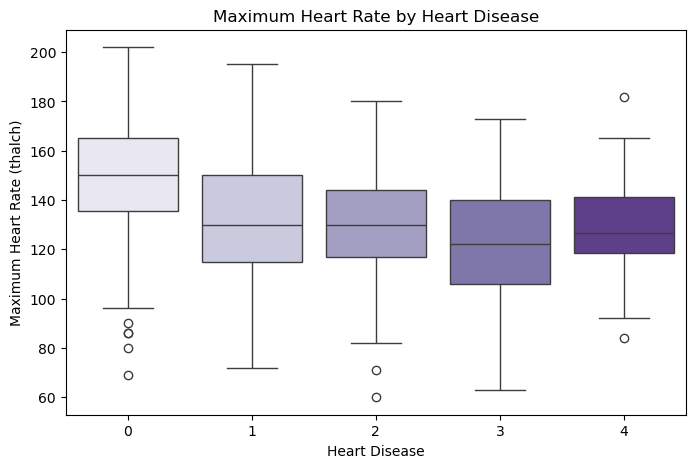

In [297]:
# Maximum Heart Rate Achieved (thalch) vs num (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='num', y='thalch', data=df, palette='Purples')
plt.title("Maximum Heart Rate by Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Maximum Heart Rate (thalch)")
plt.show()

This box plot illustrates the distribution of maximum heart rate (`thalch`) across different levels of heart disease severity (`num`):

- Patients without heart disease (num = 0) tend to have higher maximum heart rates, with a median close to 150 bpm.
- As the severity of heart disease increases (**num = 1 to num = 4**), the median heart rate decreases, indicating that patients with more severe heart disease generally have a lower maximum heart rate.
- The interquartile range (IQR) shrinks slightly as heart disease severity increases, suggesting that individuals with severe heart disease tend to have lower heart rate variability.
- Outliers are present in all groups, but lower values (below 80 bpm) are more frequent in patients with severe heart disease.

## Interpretation:
- There is a negative correlation between heart disease severity and maximum heart rate. Patients with heart disease, particularly at more severe stages, tend to have lower maximum heart rates.
- This aligns with the medical understanding that individuals with heart disease often have a reduced capacity for exercise and cardiovascular stress response.

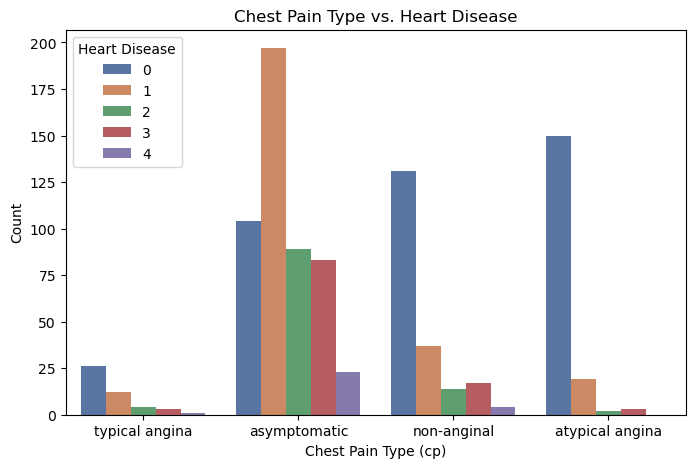

In [298]:
#Chest Pain Type (cp) vs num (Countplot)
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='num', data=df, palette='deep')
plt.title("Chest Pain Type vs. Heart Disease")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()

This bar chart visualizes the relationship between chest pain type (`cp`) and different levels of heart disease severity (`num`).

#### Key Observations:
- Asymptomatic chest pain is the most common type among heart disease patients.
  - The majority of individuals with mild to critical heart disease (num = 1 to 4) experience **asymptomatic chest pain**.
  - This suggests that many patients with heart disease do not experience traditional chest pain symptoms, making diagnosis potentially more challenging.

- Patients without heart disease (`num = 0`) predominantly have atypical or non-anginal chest pain. 
  - The largest count in the `num = 0` group is in the **atypical angina and non-anginal chest pain categories**.
  - This indicates that chest pain in these cases may not be directly related to heart disease.

- Typical angina is relatively uncommon across all categories. 
  - This suggests that angina symptoms are not always the primary indicator of heart disease.
  
### Interpretation:
- Asymptomatic chest pain is a strong predictor of heart disease.
  - Since many heart disease patients fall under this category, routine screening is crucial for those with risk factors (e.g., high blood pressure, cholesterol).
  
- Non-anginal and atypical angina are more frequent in individuals without heart disease.
  - This could mean that other conditions (such as acid reflux or musculoskeletal pain) might be mistaken for heart-related chest pain.
  
- Doctors should not rely solely on typical angina symptoms to diagnose heart disease.
  - Many patients with severe heart disease may not experience chest pain in a traditional manner, highlighting the need for comprehensive diagnostic methods.


# Preprocessing the Data

In [332]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split


In [333]:
# Convert boolean columns to integers
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)


le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
 


In [313]:
#One-hot encode categorical object columns
categorical_cols = ['cp', 'restecg', 'slope', 'thal', 'Category_bps']

df = pd.get_dummies(df, columns=categorical_cols)

In [315]:
bool_cols = df.select_dtypes(include='bool').columns
print(bool_cols)

#converting bool into int
df[bool_cols] = df[bool_cols].astype(int)


Index([], dtype='object')


In [330]:
columns_to_scale = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [326]:
# Separate features and target
X = df.drop("num", axis=1)
y = df["num"]


In [331]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)